In [1]:
#Importing the libraries 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt 
import pickle

In [2]:
# Importing the stock data and storing it in a dataframe

import json
import pandas as pd

tunisian_stock_market = 'Tunisian-Stock-Market.json'
with open(tunisian_stock_market, 'r') as json_file:
    
    json_data = json.load(json_file)

RawStockData = pd.DataFrame(json_data)
bna_data = RawStockData[RawStockData['Stock_name'] == 'BNA']
bna_data.reset_index(inplace=True)
columnsToExclude = ['Code_isin','index','Stock_name']
bna_data = bna_data.drop(columns=columnsToExclude)
bna_data = bna_data.sort_values(by='Date')
print(bna_data)

            Date  Adj_Close  Adj_low  Adj_High         Volume
2688  2011-01-03     11.173   10.952    11.298    1721.199951
2687  2011-01-04     11.129   10.952    11.129  105979.023438
2686  2011-01-05     11.349   10.989    11.349   86125.226562
2685  2011-01-06     11.283   11.173    11.393   43161.000000
2684  2011-01-07     11.305   11.210    11.320   52695.449219
...          ...        ...      ...       ...            ...
4     2021-10-29      7.340    7.300     7.340    6610.660156
3     2021-11-01      7.320    7.200     7.340    5781.819824
2     2021-11-02      7.310    7.200     7.320   24964.289062
1     2021-11-03      7.320    7.100     7.320   34433.000000
0     2021-11-04      7.320    7.220     7.320    6137.930176

[2689 rows x 5 columns]


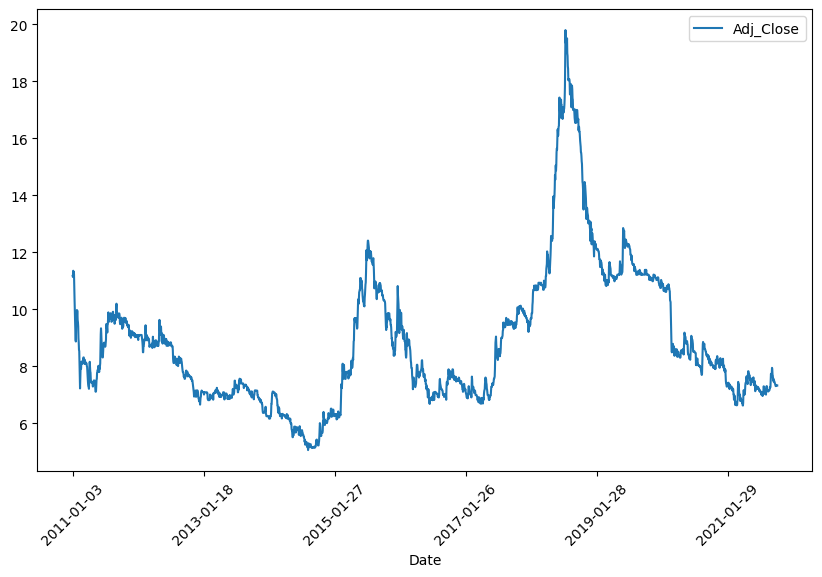

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed
bna_data.plot(x='Date', y='Adj_Close', ax=ax)
plt.xticks(rotation=45)
plt.show()

In [4]:
#Creating the model
model = RandomForestRegressor()

In [5]:
#Training the model
X = bna_data[['Adj_low','Adj_High','Volume']]
X = X[:int(len(bna_data)-1)]
y = bna_data['Adj_Close']
y = y[:int(len(bna_data)-1)]
model.fit(X,y)

RandomForestRegressor()

In [6]:
#Test the model 
predictions = model.predict(X)
print('The models score is :', model.score(X,y))

The models score is : 0.9872802024439712


In [7]:
#Make the predictions 
test_data = bna_data[['Adj_low','Adj_High','Volume']].tail(2)
print(test_data)
test_data = test_data[['Adj_low','Adj_High','Volume']].head(1)
print(test_data)
prediction = model.predict(test_data)
print('The model predicts the last row or day to be : ' , prediction)
print('Actual value is  :' , bna_data[['Adj_Close']].tail(1).values[0][0])  


   Adj_low  Adj_High        Volume
1     7.10      7.32  34433.000000
0     7.22      7.32   6137.930176
   Adj_low  Adj_High   Volume
1      7.1      7.32  34433.0
The model predicts the last row or day to be :  [7.28611]
Actual value is  : 7.32


In [8]:
#Saving the model
with open('RandomForestPredictionStock.pkl', 'wb') as file:
    pickle.dump(model, file)

In [9]:
#Loading the model 
with open('RandomForestPredictionStock.pkl', 'rb') as file:
    model = pickle.load(file)

The model predicts the last row or day to be: [7.2996]
Actual value is: 7.32

Evaluation Metrics:
Mean Squared Error (MSE): 0.0004161599999999808
Mean Absolute Error (MAE): 0.02039999999999953
Root Mean Squared Error (RMSE): 0.02039999999999953
R-squared (Coefficient of Determination): nan


c:\Users\namid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


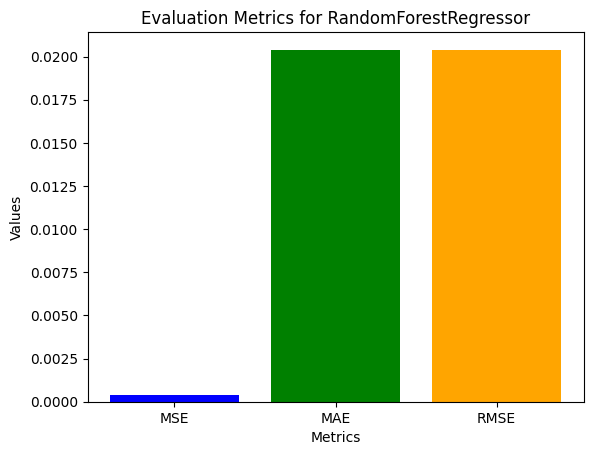

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#Creating the model
model = RandomForestRegressor()

#Training the model
X_train = bna_data[['Adj_low', 'Adj_High', 'Volume']][:-1]  # Exclude the last row for testing
y_train = bna_data['Adj_Close'][:-1]
model.fit(X_train, y_train)

#Test the model on the last row
X_test = bna_data[['Adj_low', 'Adj_High', 'Volume']].tail(1)
y_test = bna_data['Adj_Close'].tail(1)
prediction = model.predict(X_test)

# Print the predicted and actual values
print('The model predicts the last row or day to be:', prediction)
print('Actual value is:', y_test.values[0])

# Calculate evaluation metrics
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, prediction)

print("\nEvaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (Coefficient of Determination):", r_squared)

# Plotting the evaluation metrics
labels = ['MSE', 'MAE', 'RMSE']
values = [mse, mae, rmse]

plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title('Evaluation Metrics for RandomForestRegressor')
plt.xlabel('Metrics')
plt.ylabel('Values')

plt.show()


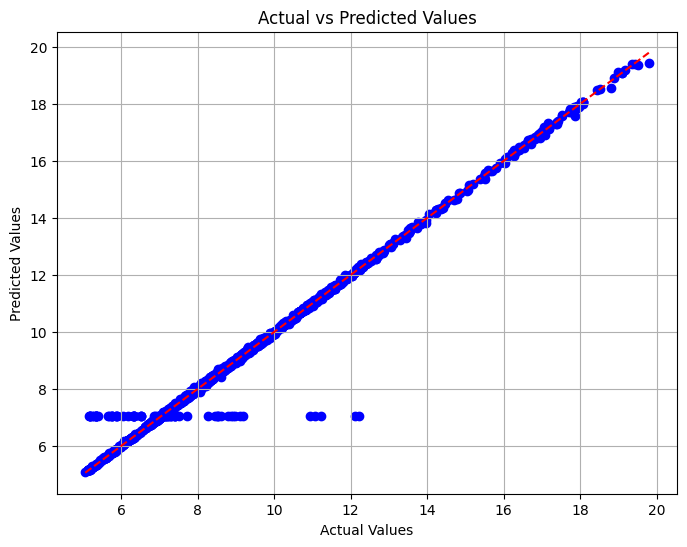

In [17]:
# Extracting actual values from bna_data
y_true = bna_data['Adj_Close']

# Predicting values using your model
y_pred = model.predict(bna_data[['Adj_low', 'Adj_High', 'Volume']])

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Diagonal line for reference
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

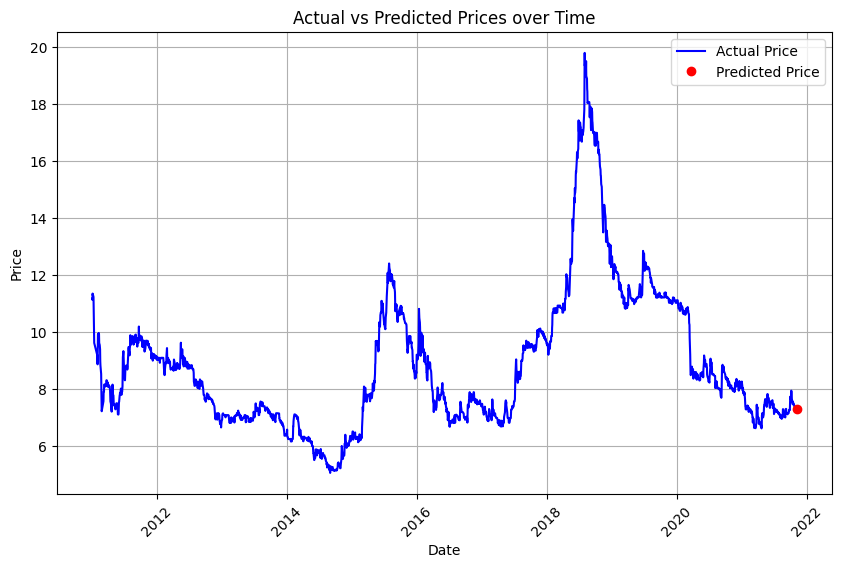

In [18]:
import matplotlib.pyplot as plt

# Plotting actual and predicted prices as a function of date
plt.figure(figsize=(10, 6))

# Plotting actual prices
plt.plot(bna_data['Date'], bna_data['Adj_Close'], label='Actual Price', color='blue')

# Plotting predicted prices
plt.plot(bna_data['Date'].iloc[-1] + pd.Timedelta(days=1), prediction, 'ro', label='Predicted Price')  # Plotting predicted price as a red dot

plt.title('Actual vs Predicted Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


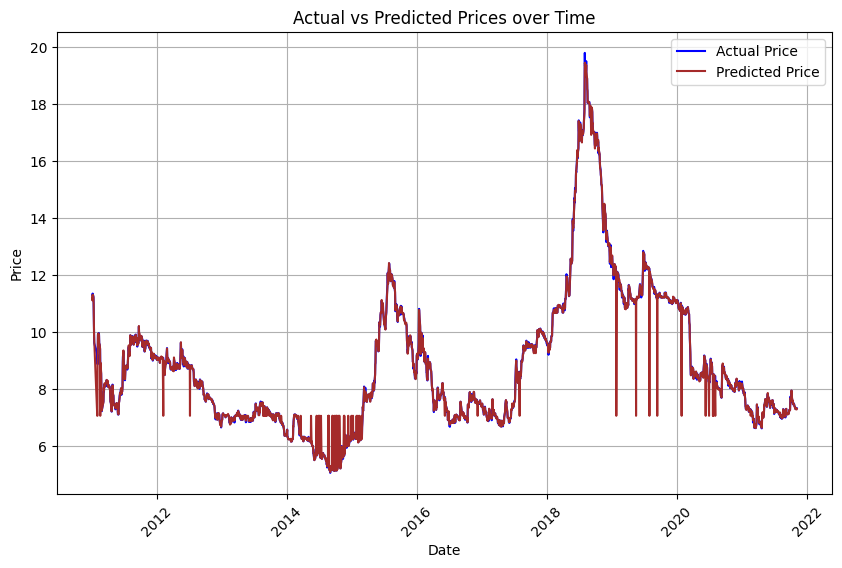

In [26]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(bna_data):
    # Predicting values for the entire dataset
    predicted_values = model.predict(bna_data[['Adj_low', 'Adj_High', 'Volume']])

    # Adding the predicted values to the DataFrame
    bna_data['Predicted_Adj_Close'] = predicted_values

    # Plotting actual and predicted prices as a function of date
    plt.figure(figsize=(10, 6))

    # Plotting actual prices
    plt.plot(bna_data['Date'], bna_data['Adj_Close'], label='Actual Price', color='blue')

    # Plotting predicted prices
    plt.plot(bna_data['Date'], bna_data['Predicted_Adj_Close'], label='Predicted Price', color='brown')

    plt.title('Actual vs Predicted Prices over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with your bna_data
plot_actual_vs_predicted(bna_data)
